In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn import datasets

In [2]:
colormap = {0:'black', 1:'red', 2:'blue'}
def plot_region(model,dlim,features=[]):
    d1lim = dlim[:2]
    d2lim = dlim[2:]
    d1_grid, d2_grid = np.meshgrid(np.arange(d1lim[0], d1lim[1], 0.02), np.arange(d2lim[0], d2lim[1], 0.02))
    X0 = d1_grid.ravel()
    X1 = d2_grid.ravel()
    
    d12_array = np.empty((len(X0),2+len(features)))
    d12_array[:,0] = X0
    d12_array[:,1] = X1
    i=2

    for feature in features:
        d12_array[:,i] = feature(X0,X1)
        i += 1
    
    y_array = model.predict(d12_array)
    y_array = le.inverse_transform(np.argmax(y_array, axis=1))
    y_grid = y_array.reshape(d1_grid.shape)
    plt.contourf(d1_grid, d2_grid, y_grid, cmap='Pastel2')

In [3]:
def plot_region_scatter(model,features=[]):

    plt.figure(figsize=(8,7))

    # Data with a scatter plot
    s = plt.scatter(x=X.iloc[:,0], y=X.iloc[:,1], c=wine.iloc[:,-1].map(colormap))
    a = plt.axis()
    s.set_zorder(2)

    # plot the two regions
    print(features)
    plot_region(model,a,features)

    plt.xlabel(x0,fontsize=20)
    plt.ylabel(x1,fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [4]:
data = datasets.load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine['class'] = data.target

x0 = 'total_phenols'
x1 = 'color_intensity'
X = wine.loc[:,[x0,x1]]
y = wine.loc[:,'class']

### encode class values as integers

In [5]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

### integer encode


In [6]:
le = LabelEncoder()
int_labels = le.fit_transform(y)

### binary encode


In [7]:
ohe = OneHotEncoder(sparse=False)
int_labels = int_labels.reshape(len(int_labels), 1)
ohe_labels = ohe.fit_transform(int_labels)

### invert 

In [8]:
le.inverse_transform(np.argmax(ohe_labels, axis=1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## Define The Neural Network Model

4 inputs -> [8 hidden nodes] -> 3 outputs

In [10]:
model = Sequential([
    Dense(6, input_dim=2, activation='relu'),
    Dense(3, activation="softmax") ])

model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, ohe_labels, epochs=200, verbose=0)

Text(0, 0.5, 'accuracy')

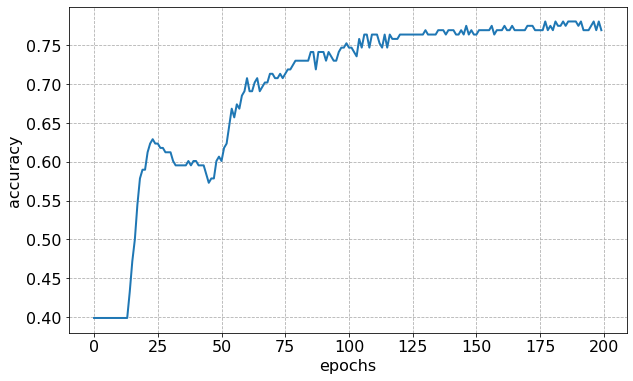

In [11]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], linewidth=2)
plt.grid(linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('epochs',fontsize=16)
plt.ylabel('accuracy',fontsize=16)

[]


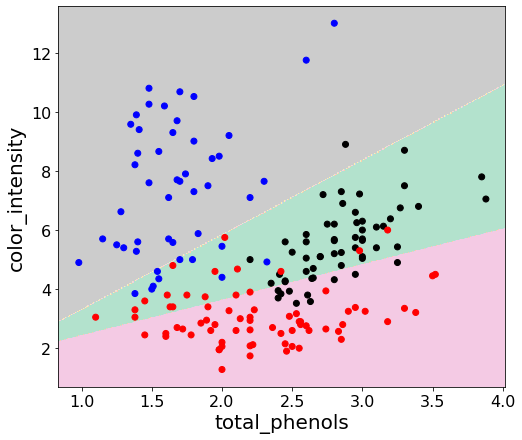

In [12]:
plot_region_scatter(model)